In [1]:
#library for data processing
import numpy as np
import pandas as pd
from scipy import stats
import math as m

#library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#library for correlation
from scipy.stats import chi2_contingency

# Analisis Data Latih

## Pertanyaan

Lakukan analisis data latih terhadap hal berikut. Insight apa yang kalian dapatkan?

1. Statistik Dasar (Mean, Min, Max, dll)
2. Duplicate Value
3. Missing Value
4. Outlier
5. Untuk Kolom Numerik: Distribusi Data (Plot dan Analisis Kurtosis) , sedangkan untuk Kolom Non Numerik: Histogram
6. Korelasi dengan Kolom Target

##


## Sneak Peek of the Data

In [7]:
#read the data
df_train = pd.read_csv('data_train.csv')
df_valid = pd.read_csv('data_validation.csv')

In [3]:
#show training data
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,804,1,0.8,1,12,1,41,0.9,89,1,...,709,818,2027,11,5,11,1,0,0,1
1,1042,0,2.2,0,15,1,11,0.6,139,5,...,68,1018,2826,18,0,2,1,0,0,2
2,1481,1,2.0,1,0,0,35,0.5,105,3,...,249,522,2635,17,16,4,1,0,1,2
3,1104,0,1.7,0,1,1,60,0.4,199,2,...,653,1413,1229,6,0,3,1,1,1,0
4,652,0,0.5,1,1,0,58,0.6,142,3,...,464,781,565,18,12,9,0,0,1,0


In [4]:
#preview the info of training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1400 non-null   int64  
 1   blue           1400 non-null   int64  
 2   clock_speed    1400 non-null   float64
 3   dual_sim       1400 non-null   int64  
 4   fc             1400 non-null   int64  
 5   four_g         1400 non-null   int64  
 6   int_memory     1400 non-null   int64  
 7   m_dep          1400 non-null   float64
 8   mobile_wt      1400 non-null   int64  
 9   n_cores        1400 non-null   int64  
 10  pc             1400 non-null   int64  
 11  px_height      1400 non-null   int64  
 12  px_width       1400 non-null   int64  
 13  ram            1400 non-null   int64  
 14  sc_h           1400 non-null   int64  
 15  sc_w           1400 non-null   int64  
 16  talk_time      1400 non-null   int64  
 17  three_g        1400 non-null   int64  
 18  touch_sc

In [10]:
df_valid.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
2,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
3,775,0,1.0,0,3,0,46,0.7,159,2,...,862,1864,568,17,15,11,1,1,1,0
4,595,0,0.9,1,7,1,23,0.1,121,3,...,441,810,3752,10,2,18,1,1,0,3


In [11]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  600 non-null    int64  
 1   blue           600 non-null    int64  
 2   clock_speed    600 non-null    float64
 3   dual_sim       600 non-null    int64  
 4   fc             600 non-null    int64  
 5   four_g         600 non-null    int64  
 6   int_memory     600 non-null    int64  
 7   m_dep          600 non-null    float64
 8   mobile_wt      600 non-null    int64  
 9   n_cores        600 non-null    int64  
 10  pc             600 non-null    int64  
 11  px_height      600 non-null    int64  
 12  px_width       600 non-null    int64  
 13  ram            600 non-null    int64  
 14  sc_h           600 non-null    int64  
 15  sc_w           600 non-null    int64  
 16  talk_time      600 non-null    int64  
 17  three_g        600 non-null    int64  
 18  touch_scre

In [ ]:
'''
Berdasarkan deskripsi atribut/kolom yang diberikan, kita dapat mengidentifikasi atribut kategorikal dan numerikal sebagai berikut:

Atribut Kategorikal:
1. blue (Memiliki bluetooth atau tidak)
2. dual_sim (Memiliki dukungan dual sim atau tidak)
3. four_g (Memiliki 4G atau tidak)
4. three_g (Memiliki 3G atau tidak)
5. touch_screen (Memiliki layar sentuh atau tidak)
6. wifi (Memiliki wifi atau tidak)

Atribut Numerikal:
1. battery_power (Total energi baterai dalam satu waktu diukur dalam mAh)
2. clock_speed (Kecepatan mikroprosesor menjalankan instruksi)
3. fc (Resolusi kamera depan dalam megapiksel)
4. int_memory (Memori internal dalam gigabyte)
5. m_dep (Ketebalan ponsel dalam cm)
6. mobile_wt (Berat ponsel)
7. n_cores (Jumlah core prosesor)
8. pc (Resolusi kamera utama dalam megapiksel)
9. px_height (Tinggi resolusi piksel)
10. px_width (Lebar resolusi piksel)
11. ram (Ukuran RAM dalam megabyte)
12. sc_h (Tinggi layar ponsel dalam cm)
13. sc_w (Lebar layar ponsel dalam cm)
14. talk_time (Waktu telepon maksimum dalam satu kali pengisian baterai)

Atribut Target:
1. price_range (target) - Ini adalah atribut target dan merupakan variabel kategorikal dengan nilai 0, 1, 2, atau 3 yang menunjukkan rentang harga.

Semua atribut di atas telah diklasifikasikan berdasarkan sifat kategorikal atau numerikalnya.

Kemudian, berdasarkan pembagian data:
1. Data Training: 1400 baris
2. Data Validation: 600 baris
Sehingga, train:valid = 70:30

Pada tugas kecil kali ini akan diminta untuk melakukan analisis terhadap data latih
'''

Separasi antara atribut numerik dan kategorikal

In [12]:
X_train = df_train.drop(columns=['price_range'])
y_train = df_train['price_range']

In [39]:
#separate categorical and numerical features
numerical_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
target_feature = ['price_range']


# Bagian Pertanyaan

## 1. Melakukan penarikan insight data terhadap statistik dasar

In [14]:
def descriptive_statistic(df,features):
     ft = []
     mean = []
     median = []
     mode = []
     std_dev = []
     variance = []
     data_range = []
     min_val = []
     max_val = []
     q1 = []
     q3 = []
     iqr = []
     skewness = []
     kurtosis = []
     for feature in features:
          # Inisiasi kolom feature
          df_column = df[feature]
          ft.append(feature)
          # Hitung nilai mean
          mean.append(df_column.mean())

          # Hitung nilai median
          median.append(df_column.median())

          # Hitung nilai modus
          mode.append(df_column.mode()[0])

          # Hitung nilai standar deviasi
          std_dev.append(df_column.std())

          # Hitung nilai variansi
          variance.append(df_column.var())

          # Hitung nilai range
          data_range.append(df_column.max() - df_column.min())

          # Hitung nilai minimum
          min_val.append(df_column.min())

          # Hitung nilai maksimum
          max_val.append(df_column.max())

          # Hitung kuartil pertama dan ketiga
          q1.append(np.percentile(df_column, 25))
          q3.append(np.percentile(df_column, 75))

          # Hitung interquartile range (IQR)
          iqr.append(np.percentile(df_column, 75) - np.percentile(df_column, 25))

          # Hitung nilai skewness
          skewness.append(stats.skew(df_column))

          # Hitung nilai kurtosis
          kurtosis.append(stats.kurtosis(df_column))

     return pd.DataFrame({ 'fitur' : ft,
            'mean' : mean,
            'median' : median,
            'modus' : mode,
            'std_dev' : std_dev,
            'variansi' : variance,
            'range' : data_range,
            'min' : min_val,
            'max' : max_val,
            'q1' : q1,
            'q3' : q3,
            'IQR' : iqr,
            'skewness' : skewness,
            'kurtosis' : kurtosis
    }).round(3)

In [15]:
# lakukan statistik deskriptif pada kolom numerik
numerical_desc = descriptive_statistic(X_train, numerical_features)
numerical_desc

,fitur,mean,median,modus,std_dev,variansi,range,min,max,q1,q3,IQR,skewness,kurtosis
0,battery_power,1237.146,1219.0,772.0,430.052,184944.538,1497.0,501.0,1998.0,864.75,1602.00,737.25,0.042,-1.168
1,clock_speed,1.522,1.5,0.5,0.815,0.664,2.5,0.5,3.0,0.70,2.20,1.50,0.166,-1.329
2,fc,4.275,3.0,0.0,4.324,18.698,19.0,0.0,19.0,1.00,7.00,6.00,1.019,0.288
3,int_memory,31.962,32.0,27.0,18.163,329.893,62.0,2.0,64.0,16.00,48.00,32.00,0.063,-1.227
4,m_dep,0.508,0.5,0.1,0.289,0.083,0.9,0.1,1.0,0.20,0.80,0.60,0.059,-1.267
5,mobile_wt,139.376,139.0,182.0,35.401,1253.217,120.0,80.0,200.0,108.00,169.00,61.00,0.020,-1.210
6,n_cores,4.481,4.0,4.0,2.280,5.198,7.0,1.0,8.0,2.00,7.00,5.00,0.020,-1.232
7,pc,9.917,10.0,10.0,6.080,36.967,20.0,0.0,20.0,5.00,15.00,10.00,0.029,-1.164
8,px_height,643.178,561.0,88.0,444.629,197694.930,1960.0,0.0,1960.0,273.75,950.25,676.50,0.659,-0.319
9,px_width,1251.717,1247.0,1247.0,428.983,184026.286,1498.0,500.0,1998.0,876.50,1627.50,751.00,0.004,-1.176


## 2. Duplicate value

In [16]:
def attribute_duplicate(df):

    features = df.columns
    unique_max_train = []
    for feature in features:
        values = df[feature].value_counts()
        unique_max_train.append([feature, values.max(), values.idxmax()])

    return np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).sort_values(by = 'Max duplicates', ascending=False)), \
           df[df.duplicated()]

In [17]:
unique, duplicated = attribute_duplicate(df_train)

In [18]:
unique

,17,5,18,1,19,3,20,4,2,7,...,15,14,10,16,6,8,12,11,0,13
Feature,three_g,four_g,touch_screen,blue,wifi,dual_sim,price_range,fc,clock_speed,m_dep,...,sc_w,sc_h,pc,talk_time,int_memory,mobile_wt,px_width,px_height,battery_power,ram
Max duplicates,1065,742,715,709,707,704,358,338,287,223,...,151,134,91,86,36,22,6,5,5,4
Value,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.1,...,1.0,17.0,10.0,15.0,27.0,182.0,1247.0,526.0,1330.0,1229.0


In [19]:
duplicated

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


# 3. Missing value

In [30]:
def checkMissing(df):

    total = df.isnull().sum().sort_values(ascending=False)
    percent = (total/df.isnull().count() * 100).sort_values(ascending=False)
    missing_data_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data_train

In [31]:
checkMissing(df_train)

,Total,Percent
battery_power,0,0.0
px_height,0,0.0
wifi,0,0.0
touch_screen,0,0.0
three_g,0,0.0
talk_time,0,0.0
sc_w,0,0.0
sc_h,0,0.0
ram,0,0.0
px_width,0,0.0


# 4. Outlier

In [32]:
#rumus outlier : q1 - (1.5 * iqr) < data < q3 + (1.5 * iqr)
def outlier_range(q1,q3,iqr):
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    return lower, upper

In [33]:
#plot the outlier
''' 
@params:
    descriptive_statistic = descriptive_statistic(df_train, numerical_features) , from descriptive_statistic function
    df = df_train
'''
def outlier_plot(descriptive_statistic, df,):
    outlier = []
    for idx, tuple in descriptive_statistic.iterrows():
        lower, upper = outlier_range(tuple['q1'], tuple['q3'], tuple['IQR'])
        fitur = tuple['fitur']
        outlier.append(len(df[df[fitur] < lower]) +  len(df[df[fitur] > upper]))
    return pd.DataFrame({
        'fitur' : descriptive_statistic['fitur'],
        'q1': descriptive_statistic['q1'],
        'q3': descriptive_statistic['q3'],
        'IQR': descriptive_statistic['IQR'],
        'min' : descriptive_statistic['min'],
        'max' : descriptive_statistic['max'],
        'outlier' : outlier
    })


In [34]:
outlier_plot(numerical_desc, X_train)

,fitur,q1,q3,IQR,min,max,outlier
0,battery_power,864.75,1602.00,737.25,501.0,1998.0,0
1,clock_speed,0.70,2.20,1.50,0.5,3.0,0
2,fc,1.00,7.00,6.00,0.0,19.0,11
3,int_memory,16.00,48.00,32.00,2.0,64.0,0
4,m_dep,0.20,0.80,0.60,0.1,1.0,0
5,mobile_wt,108.00,169.00,61.00,80.0,200.0,0
6,n_cores,2.00,7.00,5.00,1.0,8.0,0
7,pc,5.00,15.00,10.00,0.0,20.0,0
8,px_height,273.75,950.25,676.50,0.0,1960.0,0
9,px_width,876.50,1627.50,751.00,500.0,1998.0,0


### Outlier analysis for categorical columns

In [41]:
#plot the outlier for categorical features
for column in categorical_features:
    print(df_train[column].value_counts())
    print()

blue
0    709
1    691
Name: count, dtype: int64

dual_sim
1    704
0    696
Name: count, dtype: int64

four_g
1    742
0    658
Name: count, dtype: int64

three_g
1    1065
0     335
Name: count, dtype: int64

touch_screen
0    715
1    685
Name: count, dtype: int64

wifi
0    707
1    693
Name: count, dtype: int64



In [42]:
#because the price range is considered as categorical feature, we can plot the price range
print(df_train['price_range'].value_counts())

price_range
0    358
1    356
2    345
3    341
Name: count, dtype: int64


In [ ]:
''' 
Komentar:
Tidak ditemukannya outlier pada tipe data kategorikal karena komposisi data cukup balance
'''

# 5. Numerik: Distribusi data(plot& kurtosis analysis) , kategorikal: hist

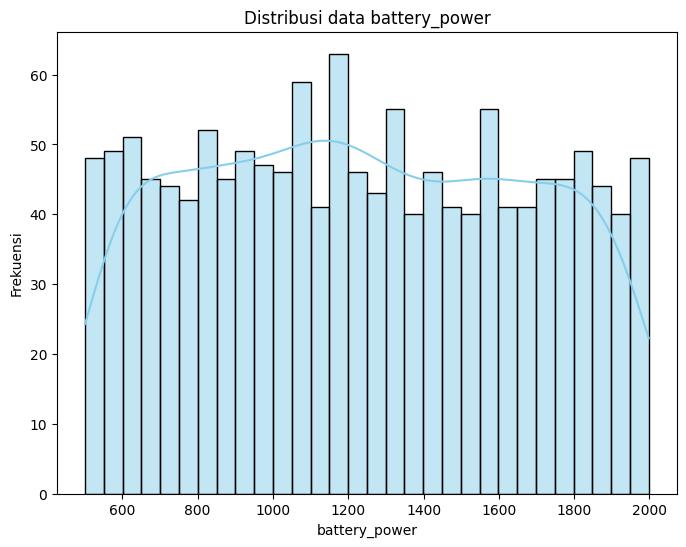

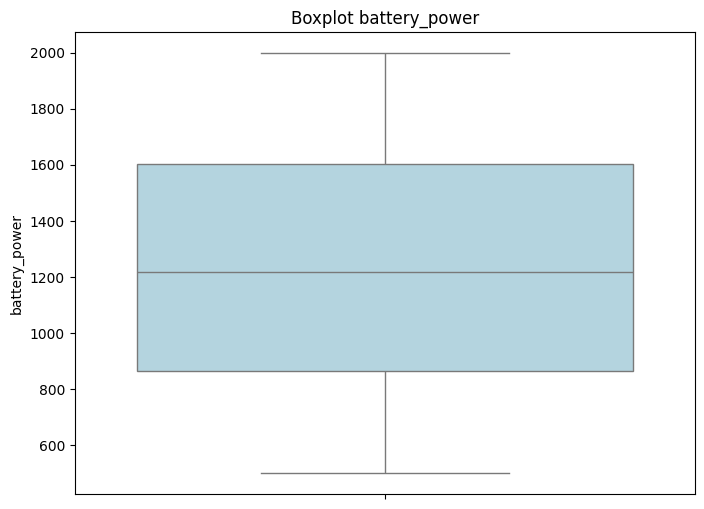

Kurtosis untuk battery_power: -1.1680683536883105


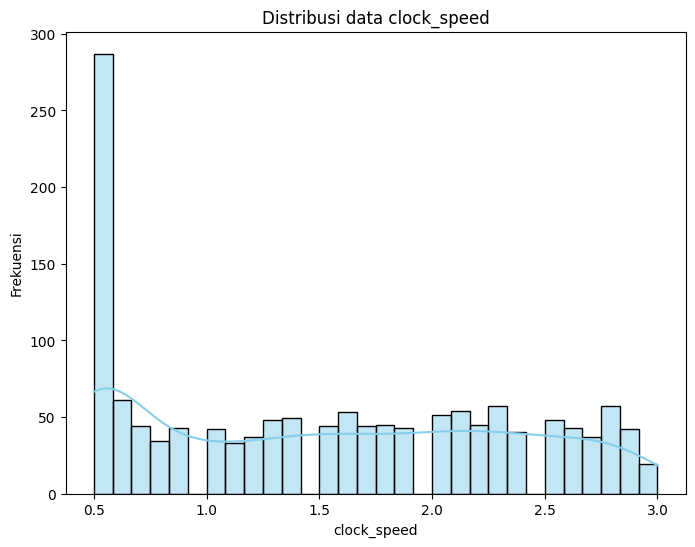

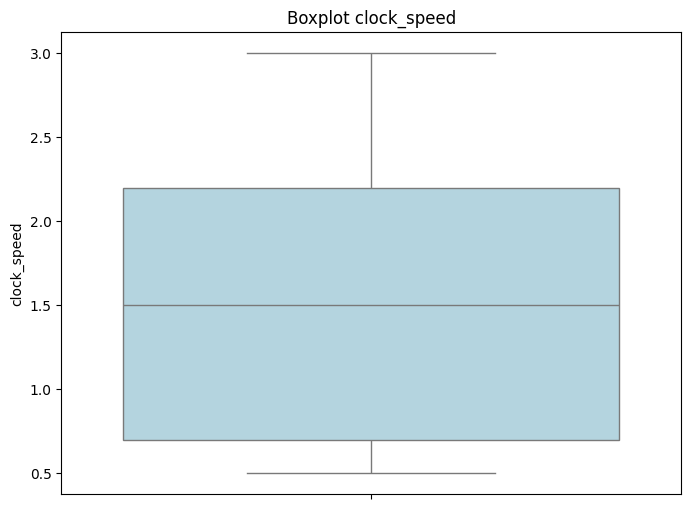

Kurtosis untuk clock_speed: -1.3295231896521231


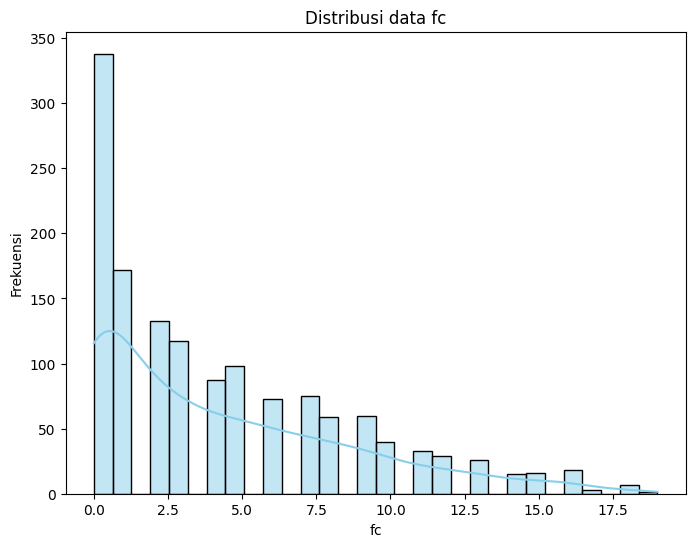

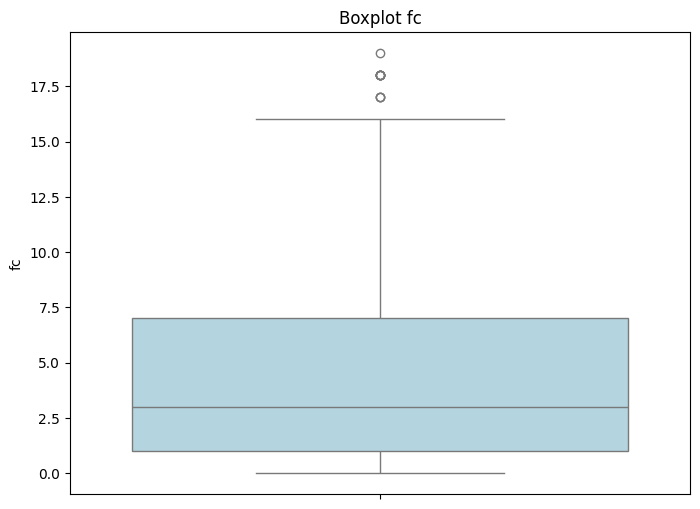

Kurtosis untuk fc: 0.29340439238319194


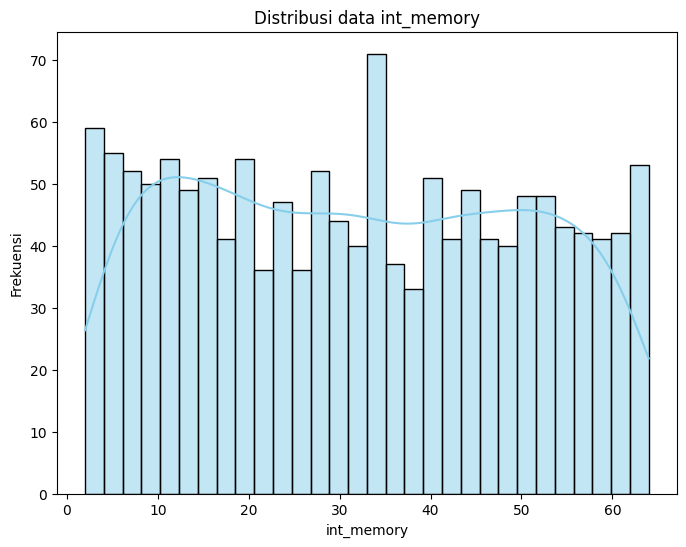

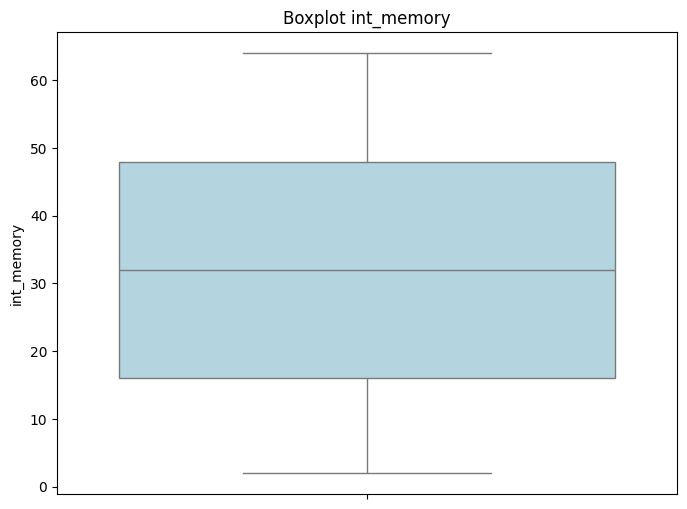

Kurtosis untuk int_memory: -1.22719971066165


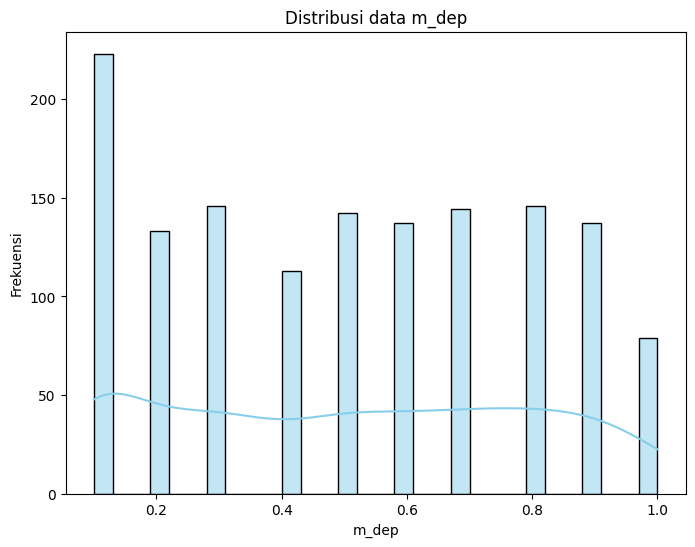

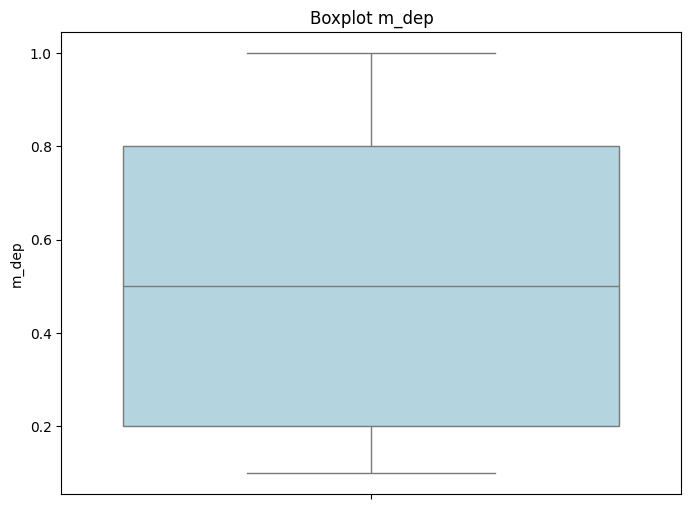

Kurtosis untuk m_dep: -1.2668226719440638


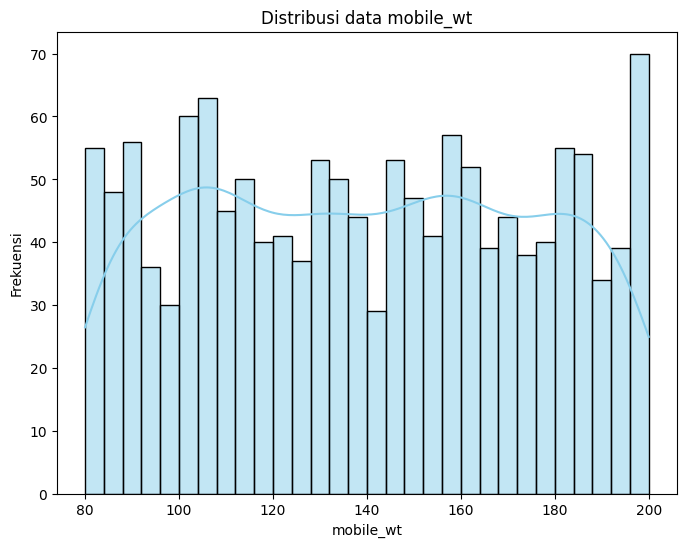

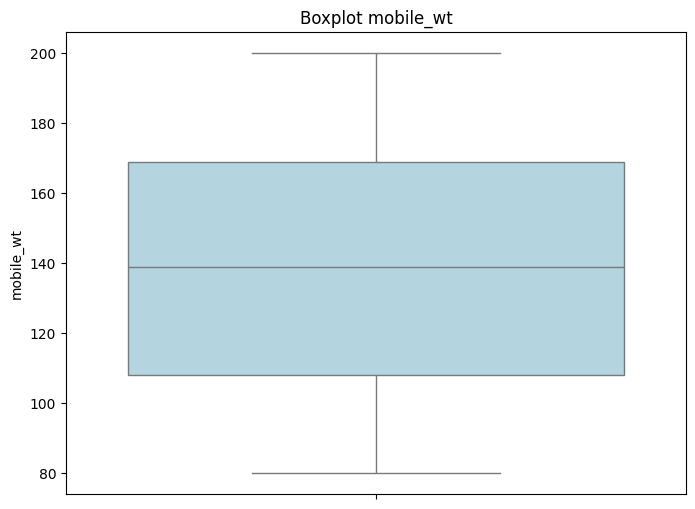

Kurtosis untuk mobile_wt: -1.210202007194779


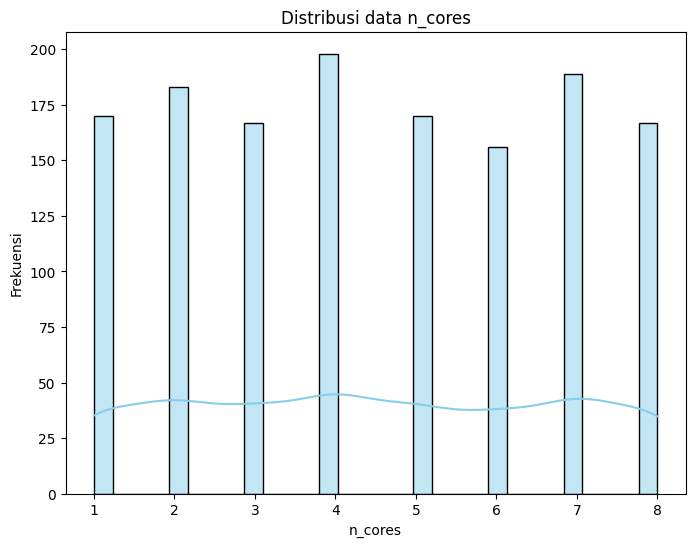

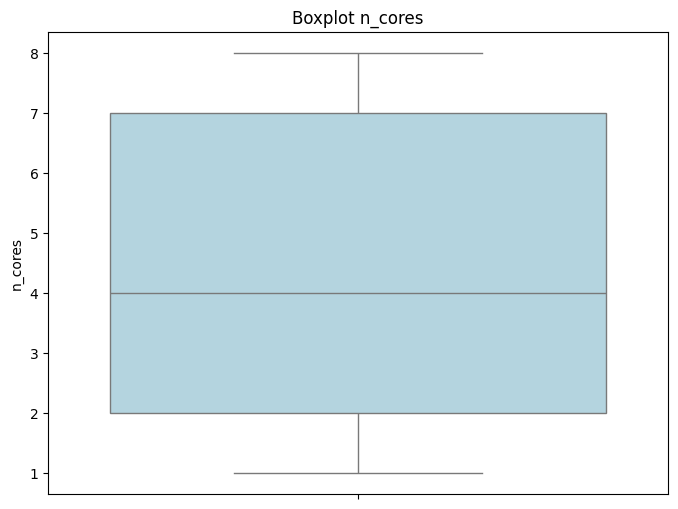

Kurtosis untuk n_cores: -1.2322085699401253


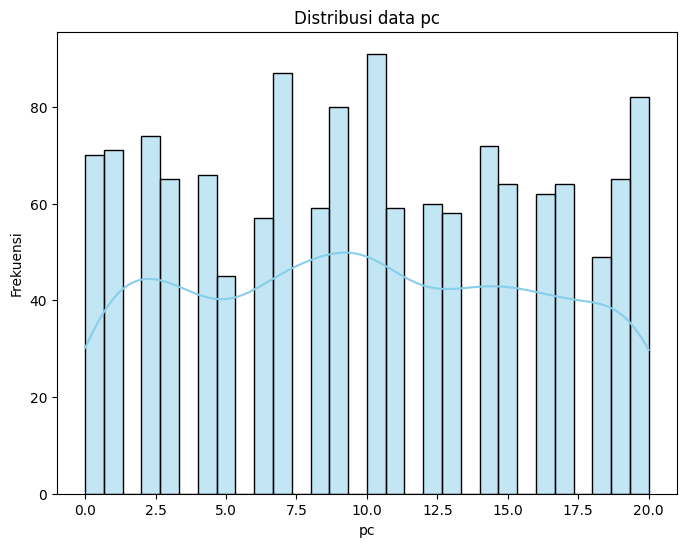

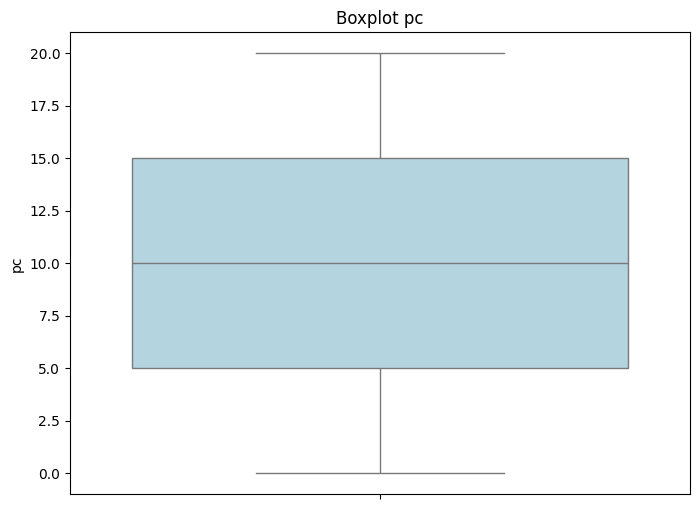

Kurtosis untuk pc: -1.1638760893853588


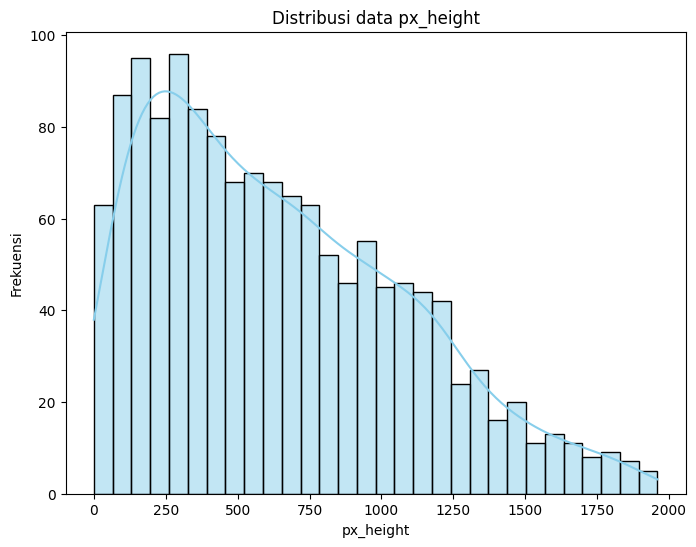

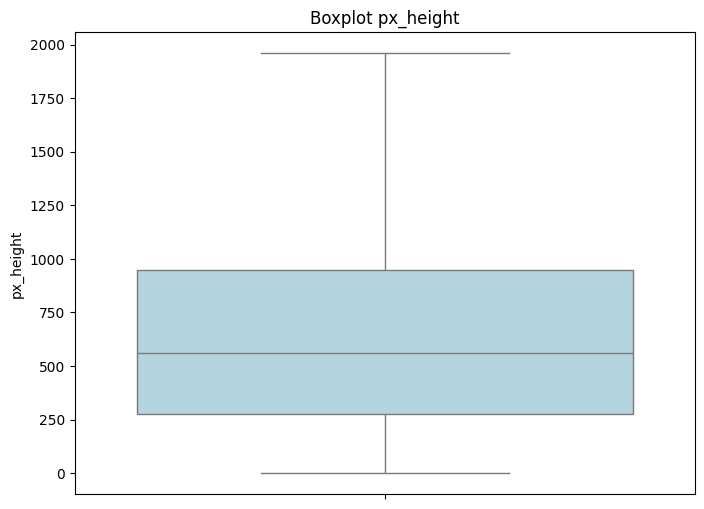

Kurtosis untuk px_height: -0.3162286486894521


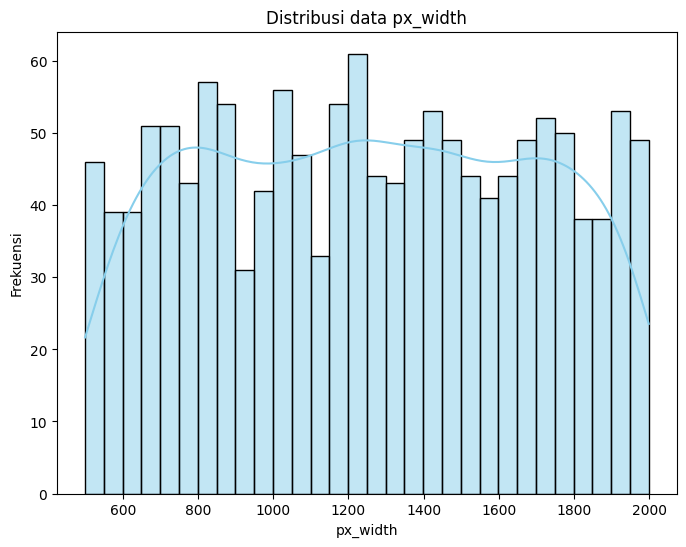

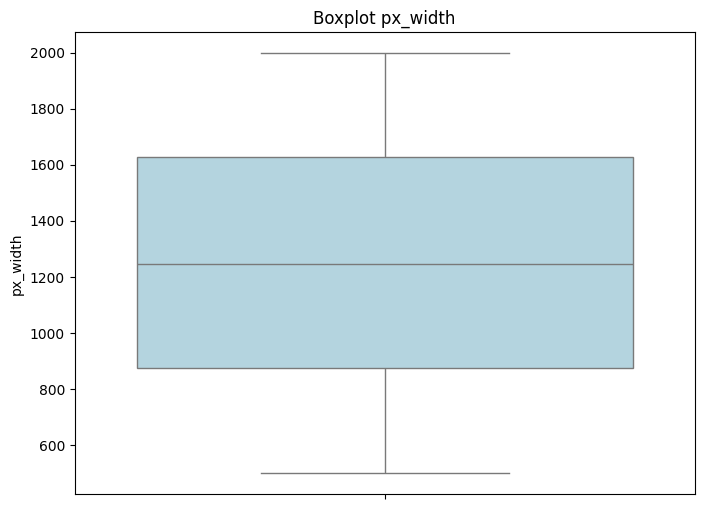

Kurtosis untuk px_width: -1.1760245181224622


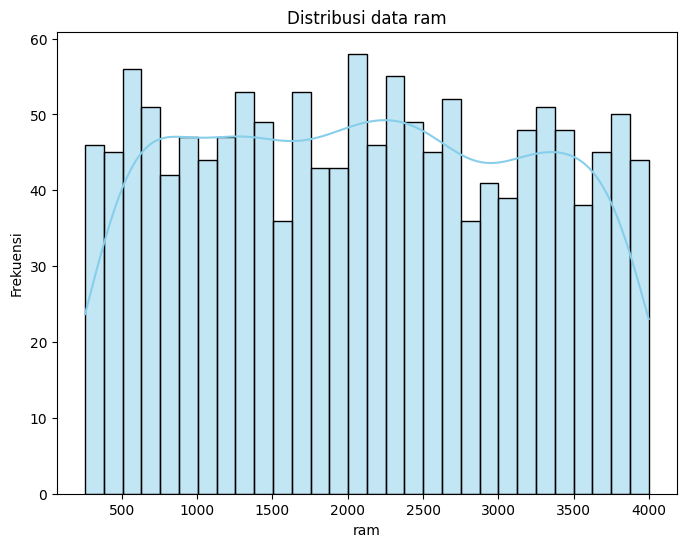

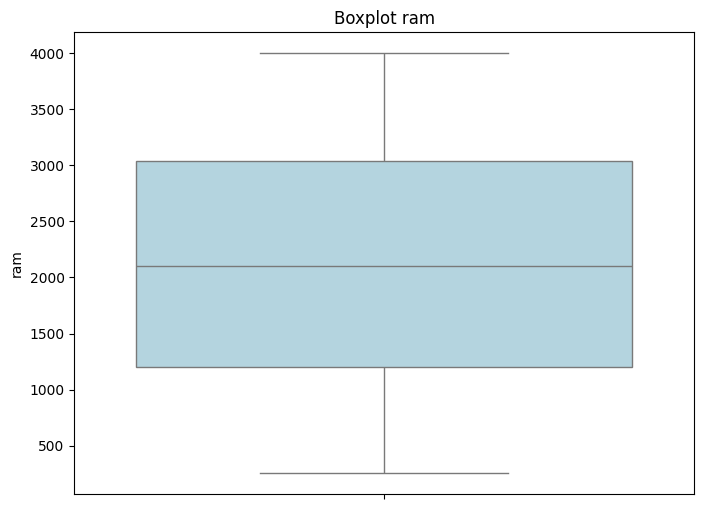

Kurtosis untuk ram: -1.1861412453532745


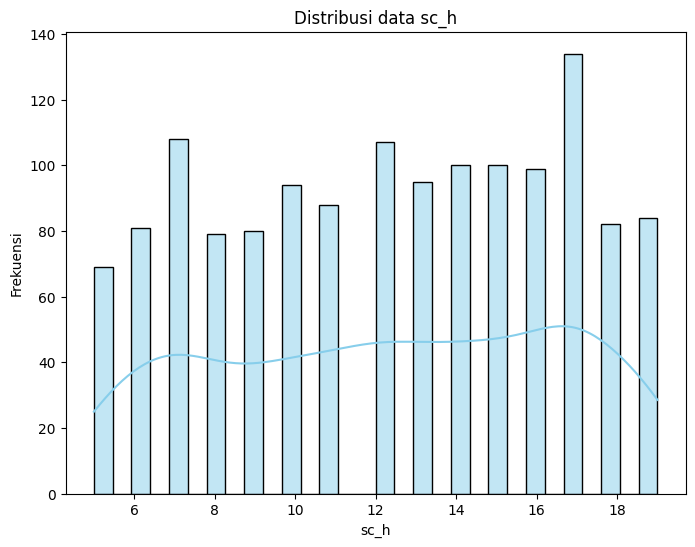

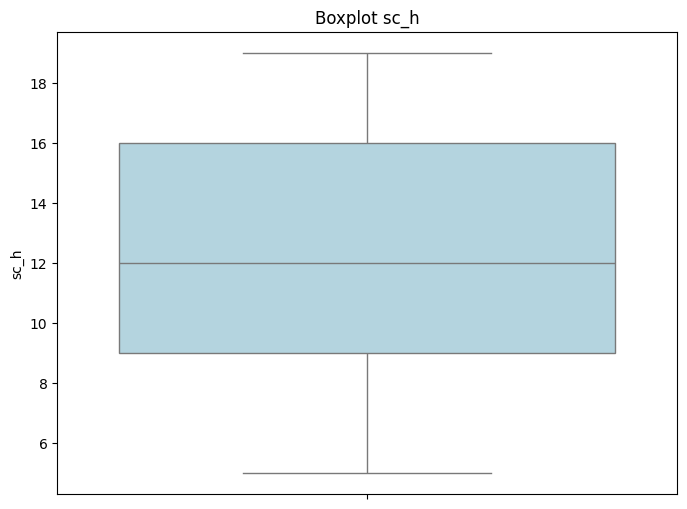

Kurtosis untuk sc_h: -1.183273418204271


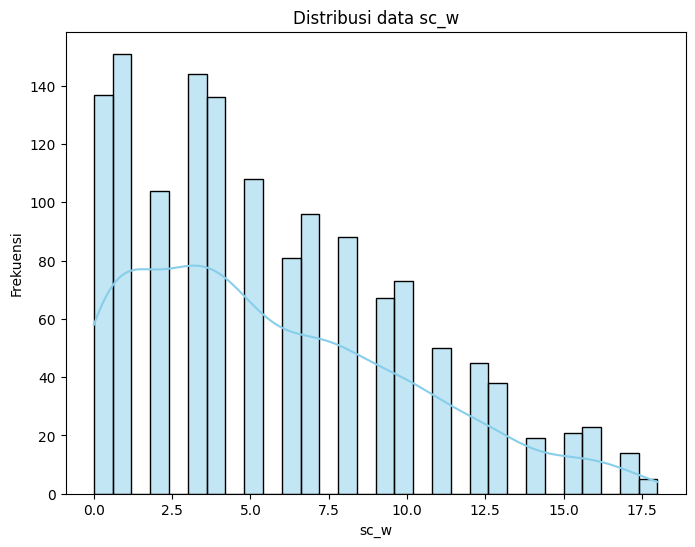

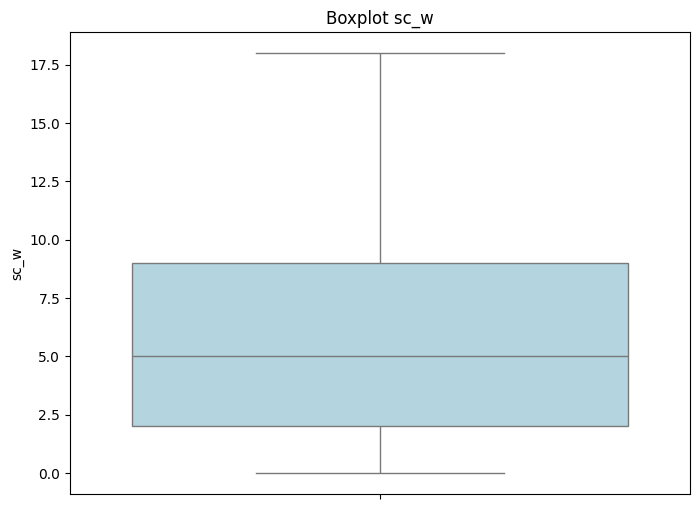

Kurtosis untuk sc_w: -0.3346408708969695


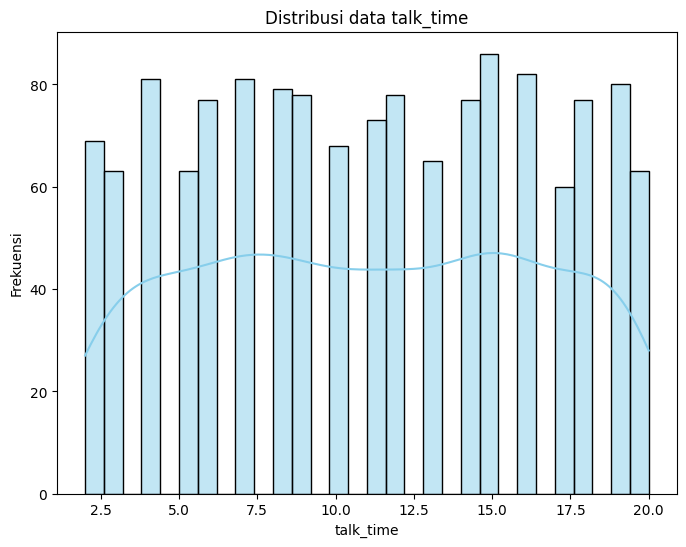

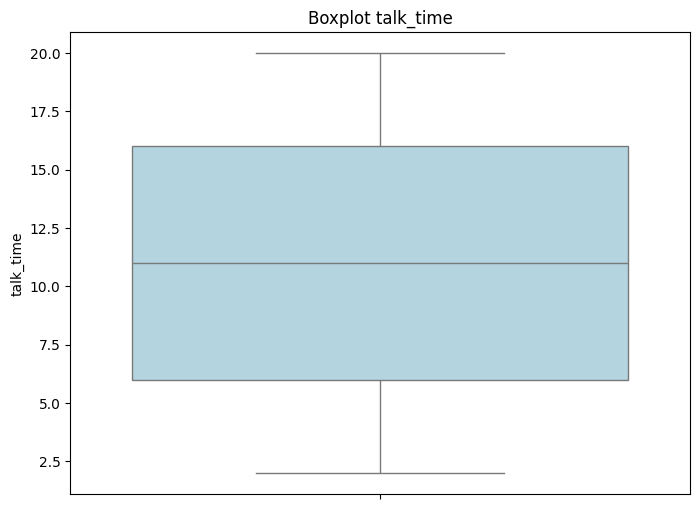

Kurtosis untuk talk_time: -1.1920181405410146


In [43]:
# Distribusi data untuk kolom numerik
for kolom in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_train[kolom], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi data {kolom}')
    plt.xlabel(kolom)
    plt.ylabel('Frekuensi')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_train, y=kolom, color='lightblue')
    plt.title(f'Boxplot {kolom}')
    plt.ylabel(kolom)
    plt.show()

    print(f"Kurtosis untuk {kolom}: {df_train[kolom].kurtosis()}")


C:\Users\seres\AppData\Local\Temp\ipykernel_15832\2541822295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=kolom, data=df_train, palette='Set2')


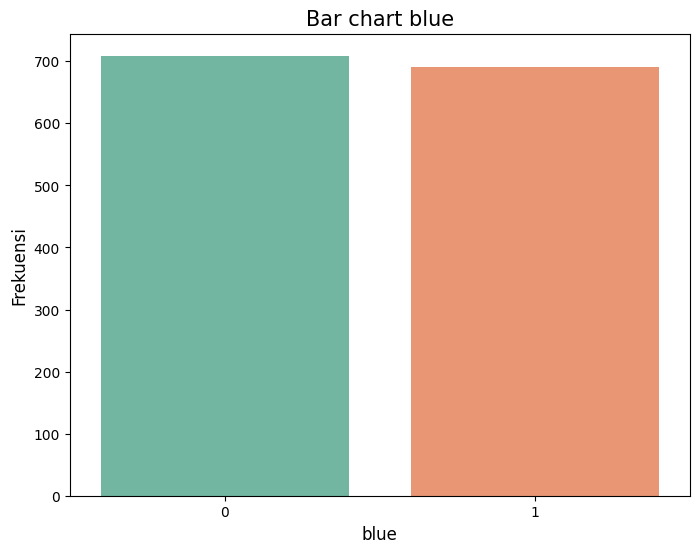

C:\Users\seres\AppData\Local\Temp\ipykernel_15832\2541822295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=kolom, data=df_train, palette='Set2')


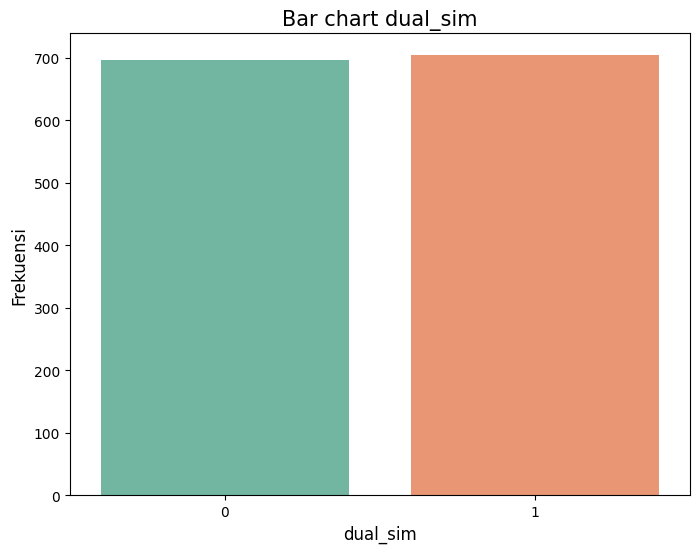

C:\Users\seres\AppData\Local\Temp\ipykernel_15832\2541822295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=kolom, data=df_train, palette='Set2')


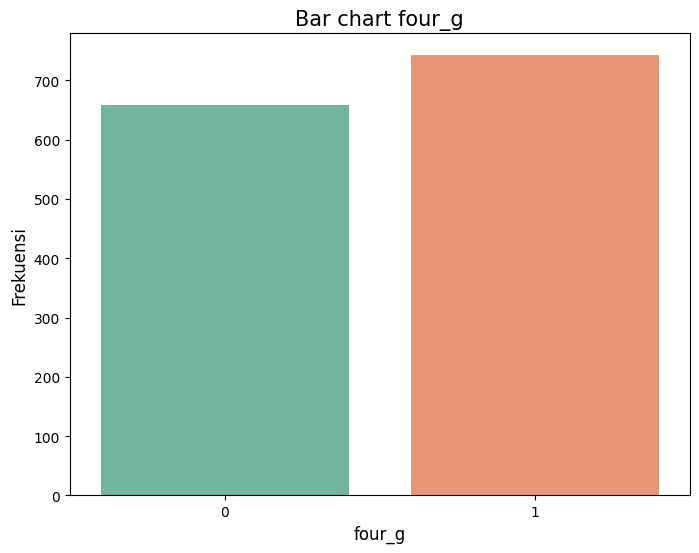

C:\Users\seres\AppData\Local\Temp\ipykernel_15832\2541822295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=kolom, data=df_train, palette='Set2')


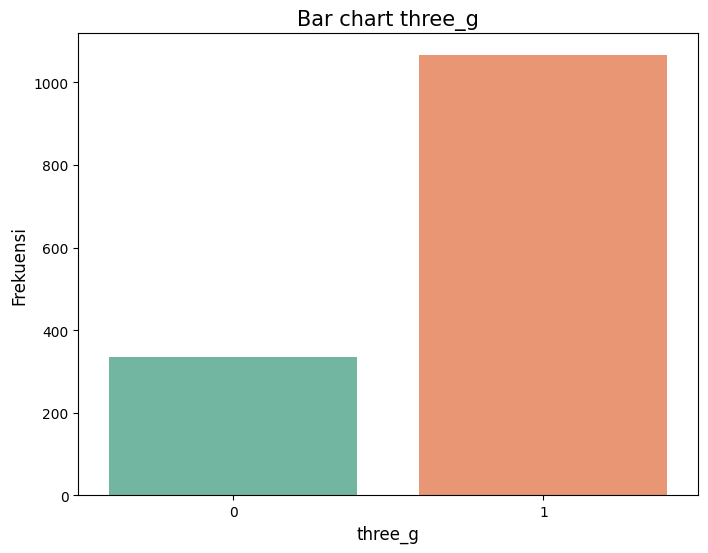

C:\Users\seres\AppData\Local\Temp\ipykernel_15832\2541822295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=kolom, data=df_train, palette='Set2')


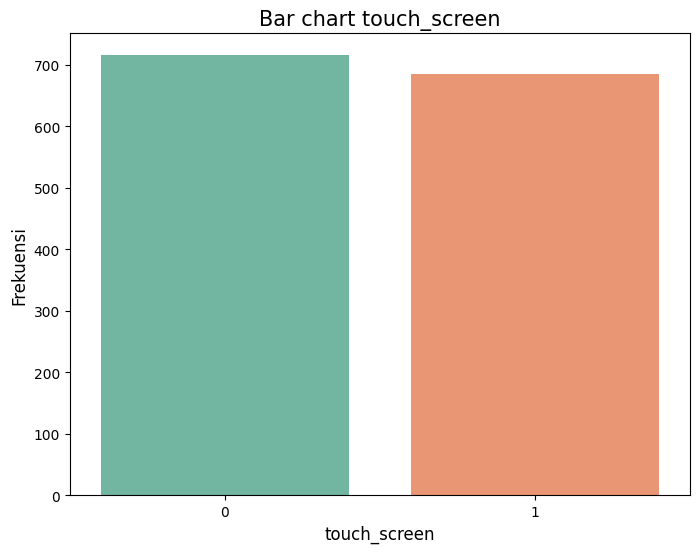

C:\Users\seres\AppData\Local\Temp\ipykernel_15832\2541822295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=kolom, data=df_train, palette='Set2')


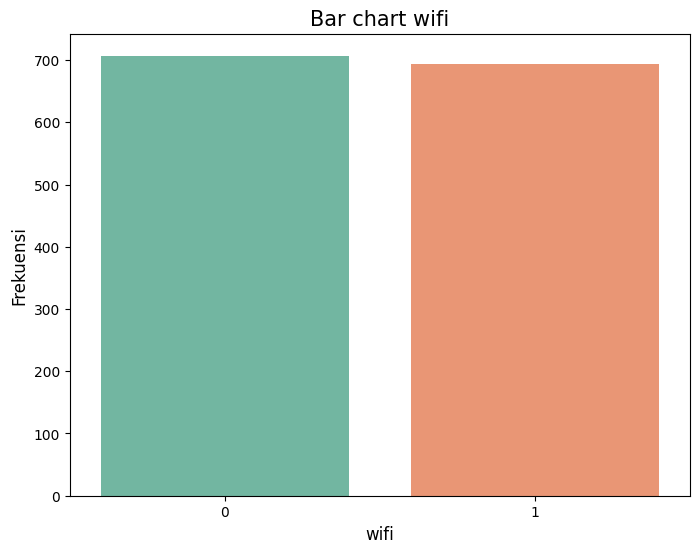

In [44]:
for kolom in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=kolom, data=df_train, palette='Set2')
    plt.title(f'Bar chart {kolom}', fontsize=15)
    plt.xlabel(kolom, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.show()

C:\Users\seres\AppData\Local\Temp\ipykernel_15832\2016513023.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=kolom, data=df_train, palette='Set2')


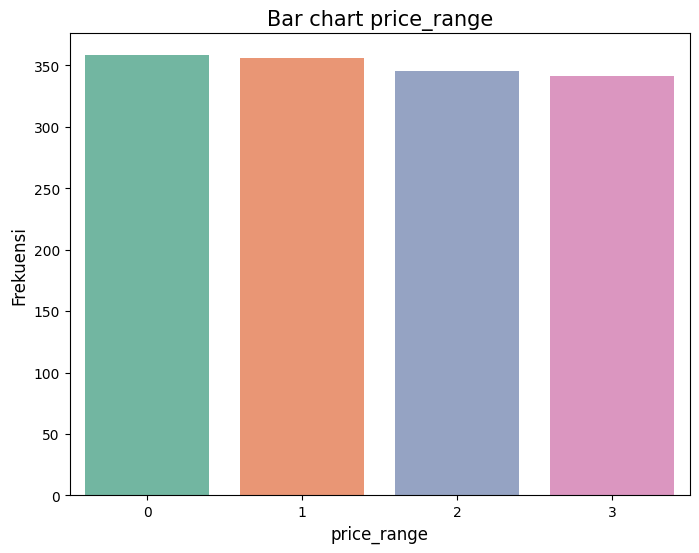

In [45]:
#plot the target feature
for kolom in target_feature:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=kolom, data=df_train, palette='Set2')
    plt.title(f'Bar chart {kolom}', fontsize=15)
    plt.xlabel(kolom, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.show()

## 6. korelasi dengan kolom target

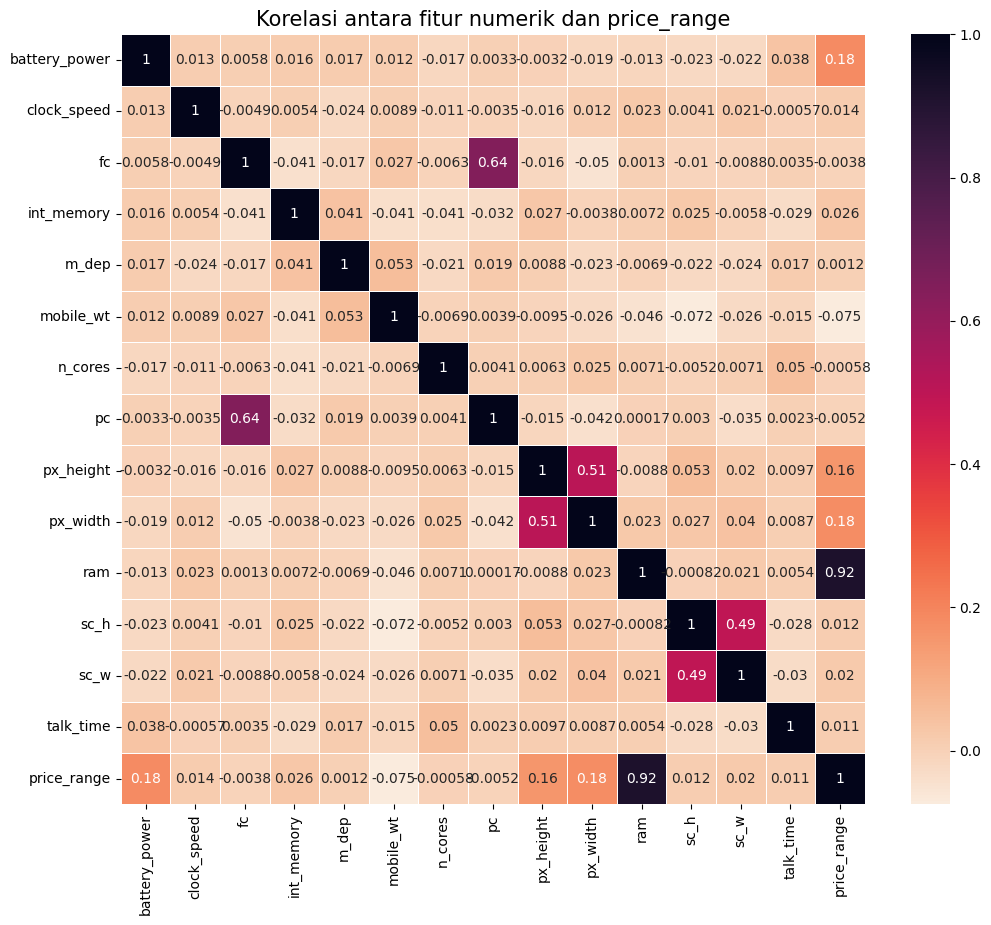

In [46]:
# Menampilkan korelasi Pearson untuk fitur numerik dengan kolom target
correlations = df_train[numerical_features + ['price_range']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='rocket_r', linewidths=0.5)
plt.title('Korelasi antara fitur numerik dan price_range', fontsize=15)
plt.show()

In [48]:
def categorical_correlations(df, features, target):
    chi2 = []
    pval = []
    for feature in features:
        cross_tab = pd.crosstab(df[feature], df[target])
        chi, p, dof, expected = chi2_contingency(cross_tab)
        chi2.append(chi)
        pval.append(p)
    return pd.DataFrame({'feature': features, 'chi2': chi2, 'pval': pval}).sort_values(by='pval', ascending=False)

In [49]:
categorical_correlations(df_train, categorical_features, 'price_range')

,feature,chi2,pval
2,four_g,1.974742,0.577666
1,dual_sim,2.709628,0.438594
0,blue,2.859217,0.413844
4,touch_screen,2.869573,0.412175
5,wifi,3.258113,0.353515
3,three_g,4.409552,0.220501
